In [1]:
import numpy as np
import matplotlib.pyplot as plt

Vi genererar slumpmässig datapunkter uniformt på $[0,1]^2$

In [2]:
np.random.seed(133)
N = 20 #number of data points
x = np.random.uniform(0,1, size = (N,2))

Sedan så definerar vi ett plan (eller en linje eftersom vi är i 2d) så om punkterna ligger ovanför så får de label y = 1 0ch ligger de under får de label y= 0

linjens exvation ges av $\vec{n}\cdot \vec{x} = c$ så punkterna får label 1 om 
$$ \vec{n}\cdot \vec{x} > c $$

In [3]:
#n,c are the parameters fo for the hyperplane separating the two sets n*x=c
n = np.array([1,2])
c = 1.2
y = np.zeros((N,)) #labels
for i in range(N):
    if (np.dot(n,x[i,:])>c):
        y[i] = 1

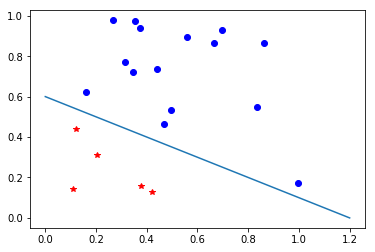

In [4]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane

Nu ska vi göre en logistisk regression. Vi har modellen 
$$f_{\omega_0,\omega_1,\omega_2}(x_1,x_2) = P(Y = 1|x,\vec{\omega}) = \frac{1}{1+e^{-(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}} = \frac{e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}}{1+e^{(\omega_0 + \omega_1 x_1 + \omega_2 x_2)}}$$
Och loss funktionen
$$L(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2),y) = -y\log(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2)) - (1-y)\log(1-f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))$$
Så lossen för all våran data är
$$L = -\sum_{i=0}^N y^i\log(f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2)) + (1-y^i)\log(1-f_{\omega_0,\omega_1,\omega_2}(x^i_1,x^i_2))$$
Det är den här lossen vi vill minimera med någon metod. Alltså hitta de optimala parametrarna $\omega_0,\omega_1,\omega_2$

## (Statistisk överkurs)
Om man undrar var lossen kommer ifrån så kan man ur ett statistiskt perspektiv se det såhär. Vi modelerar $y|x \sim Ber(f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))$. Då blir Likelihooden för vår data
$$P(y^1,y^2\cdots,y^N|x^1,x^2\cdots x^N) = \prod_{i=1}^NP(y^i|x^i) = \prod_{i=1} (f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))^{y_i}(1-f_{\omega_0,\omega_1,\omega_2}(x_1,x_2))^{1-y_1}$$
För att sannoliketsfunktionen till en $Ber(\theta)$ variabl kan skrivas som $p_Y(y) = \theta^y(1-\theta)^{1-y}$. Att maximera likelihooden är samma sak som att minimera negativ logaritmen av likelihoode. Det är det vi gör ovan. Så att minimera lossen (Som i maskininlärningsvärlden kalla cross-entropy) är helt enkelt att h

# Lösning

In [62]:
omega = np.zeros((3,))
dL_domega = np.zeros((3,))
epoch = 50
eps = 1
L_list = np.zeros((epoch,))
for i in range(epoch*N):
    ind = np.random.choice(N)
    x_ind = x[ind,:]
    y_ind = y[ind]
    t = omega[0] + omega[1]*x_ind[0]+ omega[2]*x_ind[1]
    f = 1/(1+np.exp(-t))
    if (y_ind==1):
        L = -np.log(f)
        dL_df = -1/f
    else:
        L = -np.log(1-f)
        dL_df = 1/(1-f)
    dL_dt = dL_df*np.exp(t)/((1+np.exp(t))**2)
    dL_domega[0] = dL_dt*1
    dL_domega[1] = dL_dt*x_ind[0]
    dL_domega[2] = dL_dt*x_ind[1]
    omega -= eps*dL_domega
    if i%N ==0:
        ind_2 = int(i//N)
        for j in range(N):
            x_ind = x[j,:]
            y_ind = y[j]
            t = omega[0] + omega[1]*x_ind[0]+ omega[2]*x_ind[1]
            f = 1/(1+np.exp(-t))
            if (y_ind==1):
                L = -np.log(f)
            else:
                L = -np.log(1-f)
            L_list[ind_2] += L

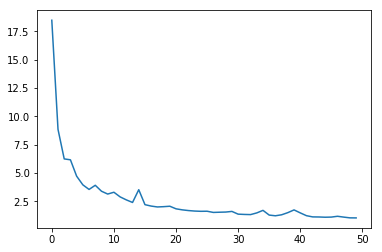

In [63]:
plt.plot(L_list)

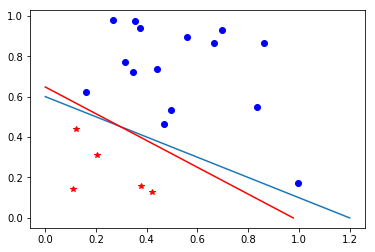

In [64]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane
plt.plot([0,-omega[0]/omega[1]],[-omega[0]/omega[2],0],'r')

In [79]:
omega = np.zeros((3,1))
dL_domega = np.zeros((3,1))
epoch = 50
eps = 1
mu = 0.1
L_list = np.zeros((epoch,))
for i in range(epoch*N):
    ind = np.random.choice(N)
    x_ind = x[ind,:]
    y_ind = y[ind]
    t = omega[0] + omega[1]*x_ind[0]+ omega[2]*x_ind[1]
    f = 1/(1+np.exp(-t))
    if (y_ind==1):
        L = -np.log(f)
        dL_df = -1/f
    else:
        L = -np.log(1-f)
        dL_df = 1/(1-f)
    dL_dt = dL_df*np.exp(t)/((1+np.exp(t))**2)
    dL_domega[0] = dL_dt*1
    dL_domega[1] = dL_dt*x_ind[0]
    dL_domega[2] = dL_dt*x_ind[1]
    JJ = dL_domega.T * dL_domega + mu*np.identity(3)
    grad  = np.linalg.solve(JJ,dL_domega)
    omega -= eps*grad
    if i%N ==0:
        ind_2 = int(i//N)
        for j in range(N):
            x_ind = x[j,:]
            y_ind = y[j]
            t = omega[0] + omega[1]*x_ind[0]+ omega[2]*x_ind[1]
            f = 1/(1+np.exp(-t))
            if (y_ind==1):
                L = -np.log(f)
            else:
                L = -np.log(1-f)
            L_list[ind_2] += L

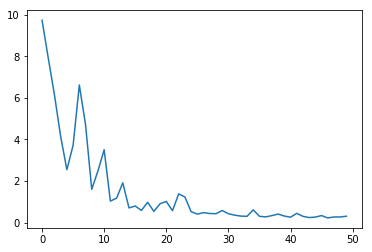

In [80]:
plt.plot(L_list)

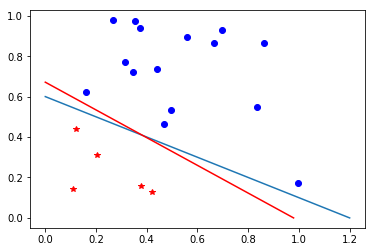

In [83]:
plt.plot(x[y==0,0],x[y==0,1],'r*') #plots all points with albels 0
plt.plot(x[y==1,0],x[y==1,1],'bo') #plots all points with labels 1
plt.plot([0,c/n[0]],[c/n[1],0]) #plots the separating hyperplane
plt.plot([0,-omega[0]/omega[1]],[-omega[0]/omega[2],0],'r')